In [88]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [83]:

def grubs_test(data, alpha=0.05):
    """
    Performs Grubbs' test to detect and remove outliers iteratively in a dataset.
    
    Parameters:
    - data: Pandas Series or DataFrame column (list or numpy array is fine too, edit to your needs)
    - alpha: Significance level for the test (default = 0.05 which is a 95% confidence interval)
    
    Returns:
    - cleaned_data: Data with outliers removed
    - outliers: A list of detected outliers
    """
    
    # Ensure data is a numpy array for easy manipulation
    data = np.array(data)
    outliers = []
    
    while True:
        n = len(data)
        if n < 3:  # Grubbs' test requires at least 3 data points
            break
        
        mean = np.mean(data)
        std_dev = np.std(data, ddof=1)
        
        # Grubbs' test statistic
        G = max(abs(data - mean)) / std_dev
        outlier_index = np.argmax(abs(data - mean))
        outlier = data[outlier_index]
        
        # Critical value calculation
        t_critical = stats.t.ppf(1 - alpha / (2 * n), n - 2)
        critical_value = ((n - 1) / np.sqrt(n)) * np.sqrt(t_critical ** 2 / (n - 2 + t_critical ** 2))
        
        # Determine if the current outlier is significant
        is_outlier = G > critical_value
        
        if is_outlier:
            outliers.append(outlier)  # Record the outlier
            data = np.delete(data, outlier_index)  # Remove it from the dataset
        else:
            break
    
    return pd.Series(data), outliers


In [94]:
# Import data from excel (could be very easily changed to .csv, .txt, etc.)
# Currently assumes data is in two plain unlabeled columns within the excel sheet
# Excel sheet must be in your current working directory (i.e. the same directory as this .ipynb file)

df = pd.read_excel('testdata.xlsx') # !! Be sure to change the string to match your filename !! 
df.columns = ['Force (N) Unscratched',"Force (N) Scratched"] # Assign headers to columns

df

,Force (N) Unscratched,Force (N) Scratched
0,29.92,16.53
1,51.16,22.13
2,45.79,15.70
3,43.36,22.80
4,45.75,29.87
...,...,...
116,24.74,22.77
117,25.82,3.99
118,25.50,0.35
119,38.01,22.27


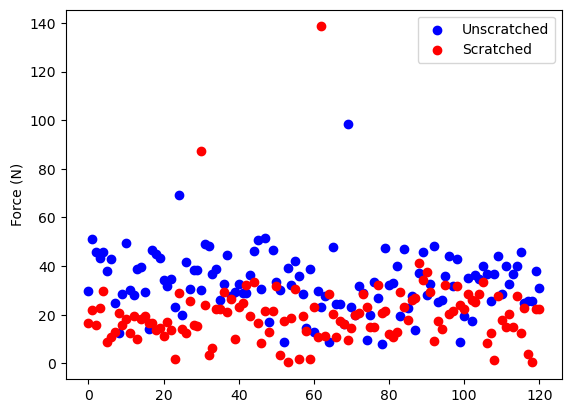

In [98]:
# Plot uncleaned data to see the difference (not strictly necessary, but fun to see)

plt.scatter(df.index, df['Force (N) Unscratched'], color='blue', label='Unscratched')
plt.scatter(df.index, df['Force (N) Scratched'], color='red', label='Scratched')

# Add labels 
plt.xlabel('')
plt.ylabel('Force (N)')

# Add legend to differentiate the datasets
plt.legend()

# Display the plot
plt.show()

In [99]:
# Apply Grubbs' test function to one column of data

data = np.array(df['Force (N) Unscratched'])
cleaned_data, outliers = grubs_test(data)

print(f"Cleaned Data (without outliers): {cleaned_data}")
if outliers:
    print(f"Detected Outliers: {outliers}")
else:
    print("No outliers detected.")

df['Force (N) Unscratched (Cleaned)'] = cleaned_data

Cleaned Data (without outliers): 0      29.92
1      51.16
2      45.79
3      43.36
4      45.75
       ...  
115    24.74
116    25.82
117    25.50
118    38.01
119    31.10
Length: 120, dtype: float64
Detected Outliers: [98.48]


In [100]:
# # Apply Grubbs' test function to other column of data

data = np.array(df['Force (N) Scratched'])
cleaned_data, outliers = grubs_test(data)

print(f"Cleaned Data (without outliers): {cleaned_data}")
if outliers:
    print(f"Detected Outliers: {outliers}")
else:
    print("No outliers detected.")

df['Force (N) Scratched (Cleaned)'] = cleaned_data



Cleaned Data (without outliers): 0      16.53
1      22.13
2      15.70
3      22.80
4      29.87
       ...  
114    22.77
115     3.99
116     0.35
117    22.27
118    22.27
Length: 119, dtype: float64
Detected Outliers: [138.57, 87.41]


In [101]:
# Remove uncleaned data from dataframe

df = df.drop('Force (N) Unscratched', axis=1)
df = df.drop('Force (N) Scratched', axis=1)


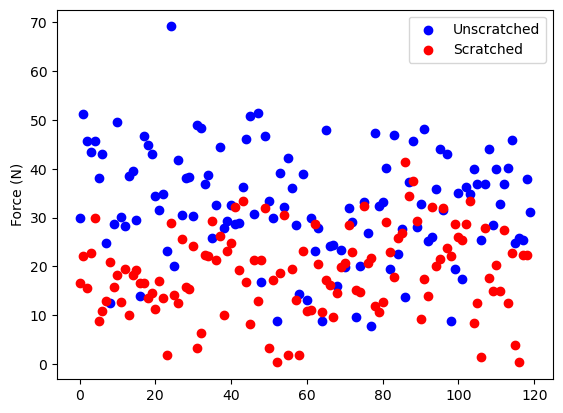

In [102]:
plt.scatter(df.index, df['Force (N) Unscratched (Cleaned)'], color='blue', label='Unscratched')
plt.scatter(df.index, df['Force (N) Scratched (Cleaned)'], color='red', label='Scratched')

# Add labels and title

plt.xlabel('')
plt.ylabel('Force (N)')

# Add legend to differentiate the datasets
plt.legend()

# Display the plot
plt.show()